# Image Deblurring - June Exam

# Assignment
## Task 

The task consists of creating a deep learning model to detect hate speech or offensive language in texts. Try to build a pipeline which is able to perform the task and evaluate the results obtained. Make sure to test the model in order to prove robustness and lack of overfitting. 

The metric you will need to use to evaluate the results is the *MSE*. The metrics will be evaluated on the reconstructed images, so provide a way to check the results on a batch composed of original images and reconstructed images.

## Dataset
The dataset is built starting from *CIFAR-10* images collection. Feel free to further split the data to build a validation set, if needed. The split into different data split is left to you, perform it as you like, making sure it is meaningful.

### Dataset creation - DO NOT MODIFY

In [1]:
import tensorflow as tf 
import random
from cv2 import GaussianBlur
import numpy as np

def getDataset():
    (x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
    normalize = lambda x: x/x.max()
    x_train = normalize(x_train)
    x_test = normalize(x_test)
    createBlurred = lambda arr: np.array([GaussianBlur(x, (5,5), ((random.random()*3)+1)) + (0.02*np.random.normal(0,1, (32, 32, 3))) for x in arr])
    return (createBlurred(x_train), x_train), (createBlurred(x_test), x_test)

# Solution
## Data visualization


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [3]:
(x_train, y_train), (x_test, y_test) = getDataset()

In [4]:
print(f'The shape of the x_train dataset is: {x_train.shape}')
print(f'The shape of the y_train dataset is: {y_train.shape}')

print(f'The shape of the x_test dataset is: {x_test.shape}')
print(f'The shape of the y_test dataset is: {y_test.shape}')

The shape of the x_train dataset is: (50000, 32, 32, 3)
The shape of the y_train dataset is: (50000, 32, 32, 3)
The shape of the x_test dataset is: (10000, 32, 32, 3)
The shape of the y_test dataset is: (10000, 32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


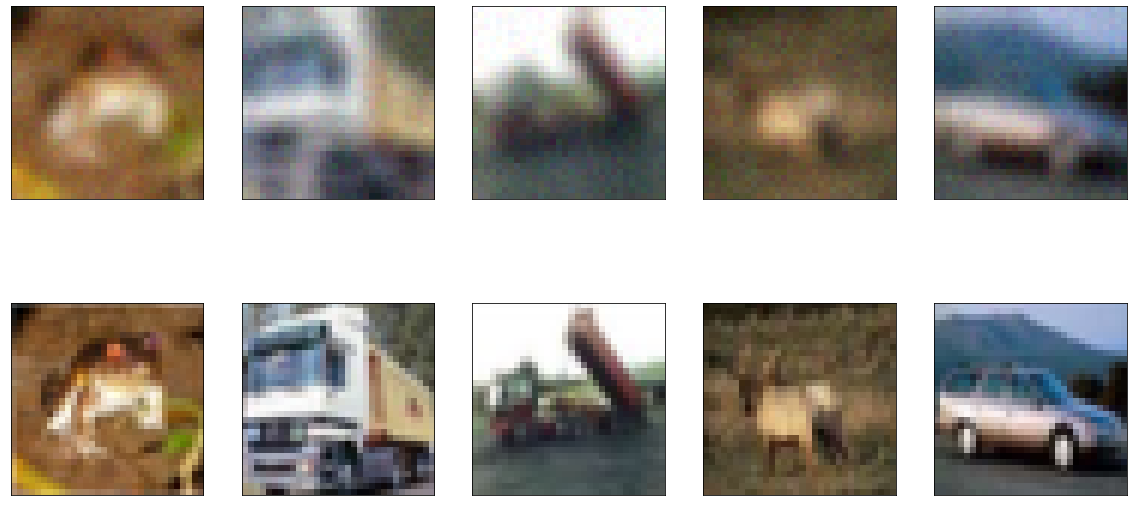

In [5]:
def plot_first_images(n_images_to_plot=5):
    plt.figure(figsize=(20, 10))
    for i in range(n_images_to_plot):
        # Display blurrd image
        ax = plt.subplot(2, n_images_to_plot, i + 1)
        plt.imshow(x_train[i], vmin=0., vmax=1.)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstructed image
        ax = plt.subplot(2, n_images_to_plot, i + 1 + n_images_to_plot)
        plt.imshow(y_train[i], vmin=0., vmax=1.)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
plot_first_images()

In [6]:
from tensorflow.keras.initializers import RandomNormal

initializer = RandomNormal(mean=0, stddev=0.01)

def build_model(input_shape):
    input_layer = layers.Input(input_shape)
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(input_layer)
    for i in range(17):
        x = layers.Conv2D(64, kernel_size=3, padding='same')(x)
        X = layers.BatchNormalization(axis=-1)(x)
        x = layers.Activation('relu')(x)
    x = layers.Conv2D(3, kernel_size=(3,3), padding='same')(x)
    x = layers.Subtract()([input_layer, x])
    model = Model(input_layer,x)
    
    return model

autoencoder = build_model(x_train.shape[1:])

In [7]:
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 64)   1792        ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 64)   36928       ['conv2d[0][0]']                 
                                                                                                  
 activation (Activation)        (None, 32, 32, 64)   0           ['conv2d_1[0][0]']               
                                                                                              

In [8]:
from tensorflow.keras.optimizers import Adam
adam = Adam(0.001)
autoencoder.compile(optimizer=adam, loss=['mse'])

In [9]:
autoencoder.fit(x_train, y_train,
                validation_split=0.2,
                epochs=20,
                batch_size=64)

Epoch 1/20
625/625 [==============================] - 51s 75ms/step - loss: 0.0040 - val_loss: 0.0031
Epoch 2/20
625/625 [==============================] - 46s 74ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 3/20
625/625 [==============================] - 47s 74ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 4/20
625/625 [==============================] - 46s 74ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 5/20
625/625 [==============================] - 47s 75ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 6/20
625/625 [==============================] - 47s 75ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 7/20
625/625 [==============================] - 47s 75ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 8/20
625/625 [==============================] - 47s 75ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 9/20
625/625 [==============================] - 47s 75ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 10/20
625/625 [==============================] - 47s 75ms/step - loss: 0.002